# 11.11 美妆数据分析

总结：
1. 护肤品占销售额的50%，比化妆品大得多。
2. 洗面奶、乳液、粉底、面膜，占比较高。
3. 用户对250元以下的产品更容易接受，畅销的可能性更大。 物美价廉的产品是大多数客户的选择。
4. 销量好的产品一般都有很多用户反馈，而且反馈往往是正面的。
5. 产品的SKU数量与销量关系不大，比如美宝莲。
6. 适当的促销可以保证高销量和销量。

建议：
1. 网购主力军仍是中低收入人群。 卖家可以通过社交平台适当调整产品价格，提高产品知名度，从而增加销量。
2. 男性消费者注重性价比和护肤品，可以推出价格实惠的男士产品。 因为男士护肤品市场还有很大的探索空间。
3. 可以将产品组合成套餐，将销量低的单品和销量高的单品进行堆叠，并提供一些促销活动来促进销量低的单品的受欢迎程度。
4. 虽然促销会影响收入，但可以产生新的客户群体并从退货中获得更多收益。

## 1.加载数据

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
file_path = 'beautymakeup in Tmal.csv'
data = pd.read_csv(file_path)

In [5]:
brand_dict = {
    '自然堂': 'Chando',
    '资生堂': 'Shiseido',
    '植村秀': 'Shu Uemura',
    '悦诗风吟': 'Innisfree',
    '玉兰油': 'Olay',
    '雅漾': 'Avene',
    '雅诗兰黛': 'Estée Lauder',
    '雪花秀': 'Sulwhasoo',
    '相宜本草': 'Inoherb',
    '薇姿': 'Vichy',
    '倩碧': 'Clinique',
    '欧珀莱': 'Aupres',
    '欧莱雅': "L'Oreal",
    '妮维雅': 'Nivea',
    '蜜丝佛陀': 'Max Factor',
    '美加净': 'Maxam',
    '美宝莲': 'Maybelline',
    '兰芝': 'Laneige',
    '兰蔻': 'Lancôme',
    '娇兰': 'Guerlain',
    '佰草集': 'Herborist', 
    'SKII': 'SK-II',
}

# a dict to store english brand names
english_brands = []

# go through the shop columns and convert them into english names
for brand in data['shop']:
    if brand in brand_dict:
        english_brands.append(brand_dict[brand])
    else:
        english_brands.append(f"Unknown ({brand})")

#put the result in the list
data['brand'] = english_brands

In [6]:
data.head()

,update_time,id,title,price,sale_count,comment_count,shop,brand
0,2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,Chando
1,2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,Chando
2,2016-11-14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂,Chando
3,2016-11-14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂,Chando
4,2016-11-14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂,Chando


该数据库包含天猫双11化妆品数据，包括日期、SKU ID、产品名称、价格、销售数量、评论数、店铺名称以及对应的英文品牌名称。
我们可以从以下几个角度考虑入手。 品牌sku数量、品牌销量、品牌销售数量、品牌评论热度、大类目占比、子类目占比、日销量变化等。

In [7]:
data.shape

(27598, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27598 entries, 0 to 27597
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   update_time    27598 non-null  object 
 1   id             27598 non-null  object 
 2   title          27598 non-null  object 
 3   price          27598 non-null  float64
 4   sale_count     25244 non-null  float64
 5   comment_count  25244 non-null  float64
 6   shop           27598 non-null  object 
 7   brand          27598 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.7+ MB


In [9]:
data['brand'].value_counts()

brand
Innisfree       3021
Herborist       2265
L'Oreal         1974
Estée Lauder    1810
Clinique        1704
Maxam           1678
Aupres          1359
Nivea           1329
Inoherb         1313
Lancôme         1285
Guerlain        1193
Chando          1190
Olay            1135
Laneige         1091
Maybelline       825
Shiseido         821
Shu Uemura       750
Vichy            746
Avene            663
Sulwhasoo        543
SK-II            469
Max Factor       434
Name: count, dtype: int64

## 2.数据清理

### 2.1 重复数据清理

In [10]:
data = data.drop_duplicates()  #Remove duplicate rows from the dataset
data.reset_index(inplace=True, drop=True)  #Reset the index of the dataframe and drop the old index as a column
data.shape

(27512, 8)

### 2.2 Missing value cleaning

In [11]:
data.isnull().any()

update_time      False
id               False
title            False
price            False
sale_count        True
comment_count     True
shop             False
brand            False
dtype: bool

In [12]:
data.describe()

,price,sale_count,comment_count
count,27512.000000,2.516200e+04,25162.000000
mean,363.423512,1.231605e+04,1121.741197
std,614.876153,5.241236e+04,5277.781581
min,1.000000,0.000000e+00,0.000000
25%,99.000000,2.780000e+02,21.000000
50%,205.000000,1.443000e+03,153.000000
75%,390.000000,6.353000e+03,669.000000
max,11100.000000,1.923160e+06,202930.000000


In [13]:
data.sale_count.mode()# Calculate the mode (most frequent value)

0    0.0
Name: sale_count, dtype: float64

In [14]:
data.comment_count.mode()# Calculate the mode (most frequent value)

0    0.0
Name: comment_count, dtype: float64

这里两列的众数都是0，从标签数据的含义可以看出销量和评论数可能都是0，所以用0来填充缺失值。

In [15]:
data.isnull().sum()

update_time         0
id                  0
title               0
price               0
sale_count       2350
comment_count    2350
shop                0
brand               0
dtype: int64

In [16]:
data = data.fillna(0)

### 2.3 将有用的值提取到新列

#### 对产品标题进行分词处理

In [17]:
#Import the Jieba library for Chinese text segmentation
import jieba

In [18]:
title_cut = [jieba.lcut(i) for i in data.title]
data['title_cut'] = title_cut
data.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\woshi\AppData\Local\Temp\jieba.cache
Loading model cost 0.939 seconds.
Prefix dict has been built successfully.


,update_time,id,title,price,sale_count,comment_count,shop,brand,title_cut
0,2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,Chando,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,..."
1,2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,Chando,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡..."
2,2016-11-14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂,Chando,"[CHANDO, /, 自然, 堂, 活泉, 保湿, 修护, 精华, 水, （, 滋润, 型..."
3,2016-11-14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂,Chando,"[CHANDO, /, 自然, 堂, , 男士, 劲爽, 控油, 洁面膏, , 100g..."
4,2016-11-14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂,Chando,"[CHANDO, /, 自然, 堂, 雪域, 精粹, 纯粹, 滋润霜, （, 清爽型, ）,..."


In [19]:
with open( 'beauty cateogry cn eng.txt', 'r', encoding='utf-8') as f:
    f.readline()
    basic_config_data = f.read()

config_data = basic_config_data.split("\n")
category_config = {}

for line in config_data:
    if len(line.strip()) > 0:
        items = line.strip().split("\t")
        if len(items) == 3:
            category_config[items[2]] = (items[0], items[1])
        elif len(items) > 3:
            for item in items[2:]:
                category_config[item] = (items[0], items[1])
category_config.pop("其他")
category_config


{'乳液': ('Skincare', 'Face_Moisturiser'),
 '美白乳': ('Skincare', 'Face_Moisturiser'),
 '润肤乳': ('Skincare', 'Face_Moisturiser'),
 '凝乳': ('Skincare', 'Face_Moisturiser'),
 "柔肤液'": ('Skincare', 'Face_Moisturiser'),
 '亮肤乳': ('Skincare', 'Face_Moisturiser'),
 '菁华乳': ('Skincare', 'Face_Moisturiser'),
 '修护乳': ('Skincare', 'Face_Moisturiser'),
 '眼霜': ('Skincare', 'Eye_care'),
 '眼部精华': ('Skincare', 'Eye_care'),
 '眼膜': ('Skincare', 'Eye_care'),
 '面膜': ('Skincare', 'Facial_mask'),
 '洗面': ('Skincare', 'Cleanser'),
 '洁面': ('Skincare', 'Cleanser'),
 '清洁': ('Skincare', 'Cleanser'),
 '卸妆': ('Skincare', 'Cleanser'),
 '洁颜': ('Skincare', 'Cleanser'),
 '洗颜': ('Skincare', 'Cleanser'),
 '去角质': ('Skincare', 'Cleanser'),
 '磨砂': ('Skincare', 'Cleanser'),
 '化妆水': ('Skincare', 'Lotion'),
 '爽肤水': ('Skincare', 'Lotion'),
 '柔肤水': ('Skincare', 'Lotion'),
 '补水露': ('Skincare', 'Lotion'),
 '凝露': ('Skincare', 'Lotion'),
 '柔肤液': ('Skincare', 'Lotion'),
 '精粹水': ('Skincare', 'Lotion'),
 '亮肤水': ('Skincare', 'Lotion'),
 '润肤水': 

In [20]:
data.title_cut

0        [CHANDO, /, 自然, 堂,  , 雪域, 精粹, 纯粹, 滋润霜, 50g,  ,...
1        [CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML,  , 淡...
2        [CHANDO, /, 自然, 堂, 活泉, 保湿, 修护, 精华, 水, （, 滋润, 型...
3        [CHANDO, /, 自然, 堂,  , 男士, 劲爽, 控油, 洁面膏,  , 100g...
4        [CHANDO, /, 自然, 堂, 雪域, 精粹, 纯粹, 滋润霜, （, 清爽型, ）,...
                               ...                        
27507    [SK, -, II, 【, 11, -, 11, 】, 全新, 大, 眼, 眼霜, ski...
27508    [SK, -, II,  , 11, -, 11, 预售, skii, 大眼, 眼霜, sk...
27509    [SK, -, II,  , 11, -, 11, 预售, skii, 前男友, 护肤, 面...
27510    [SK, -, II,  , 11, -, 11, 预售, skiisk2, 神仙, 水, ...
27511    [SK, -, II, 【, 11, -, 11, 】, 神仙, 水, 护肤, 精华, 油,...
Name: title_cut, Length: 27512, dtype: object

In [21]:
main_type = [] #main type
sub_type = [] #sub type

for i in range(len(data)):
    exist = False
    for temp in data.title_cut[i]:
        if temp in category_config:
            main_type.append(category_config.get(temp)[0])
            sub_type.append(category_config.get(temp)[1])
            exist = True
            break
    if not exist:
        sub_type.append('Other')
        main_type.append('Other')

In [22]:
len(sub_type)

27512

正如预期的那样，它等于列数
### 添加主类别main-type,sub_type作为列

In [23]:
data['sub_type'] = sub_type
data['main_type'] = main_type
data.head()

,update_time,id,title,price,sale_count,comment_count,shop,brand,title_cut,sub_type,main_type
0,2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,Chando,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",Face_Cream,Skincare
1,2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,Chando,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡...",Face_Moisturiser,Skincare
2,2016-11-14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂,Chando,"[CHANDO, /, 自然, 堂, 活泉, 保湿, 修护, 精华, 水, （, 滋润, 型...",Lotion,Skincare
3,2016-11-14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂,Chando,"[CHANDO, /, 自然, 堂, , 男士, 劲爽, 控油, 洁面膏, , 100g...",Cleanser,Skincare
4,2016-11-14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂,Chando,"[CHANDO, /, 自然, 堂, 雪域, 精粹, 纯粹, 滋润霜, （, 清爽型, ）,...",Face_Cream,Skincare


In [24]:
data['main_type'].value_counts()

main_type
Skincare    12994
Other       10760
Makeup       3758
Name: count, dtype: int64

In [25]:
data['sub_type'].value_counts()


sub_type
Other               10760
Cleanser             2926
Face_Cream           2660
Lotion               1942
Facial_mask          1579
Foundation           1498
Face_Moisturiser     1367
Eye_care             1208
Eye_makeup           1158
Serum                 816
Lipstick              816
Sunscreen             496
Contour               286
Name: count, dtype: int64

Add "For Male" as a column

In [26]:
For_Male = ['Yes'if '男' in data.title_cut[i] or '男士' in data.title_cut[i] or '男生' in data.title_cut[i] else 'No' for i in range(len(data))]
data['For_Male'] = For_Male
data.head()

,update_time,id,title,price,sale_count,comment_count,shop,brand,title_cut,sub_type,main_type,For_Male
0,2016-11-14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,Chando,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",Face_Cream,Skincare,No
1,2016-11-14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,Chando,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡...",Face_Moisturiser,Skincare,No
2,2016-11-14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂,Chando,"[CHANDO, /, 自然, 堂, 活泉, 保湿, 修护, 精华, 水, （, 滋润, 型...",Lotion,Skincare,No
3,2016-11-14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂,Chando,"[CHANDO, /, 自然, 堂, , 男士, 劲爽, 控油, 洁面膏, , 100g...",Cleanser,Skincare,Yes
4,2016-11-14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂,Chando,"[CHANDO, /, 自然, 堂, 雪域, 精粹, 纯粹, 滋润霜, （, 清爽型, ）,...",Face_Cream,Skincare,No


In [27]:
data['For_Male'].value_counts()

For_Male
No     25310
Yes     2202
Name: count, dtype: int64

In [28]:
percentage = data[data['For_Male']=="Yes"]['For_Male'].count()/len(data['For_Male'])
f"{percentage*100}%"

'8.003780168653678%'

男性占比太小，说明新的增长点可能是男性护肤。

In [29]:
# Delete useless columns
del data['title_cut']

### 将总销售额和购买日期（天）添加为一列

In [30]:
#total sales per product
data['sales'] = data['price']*data['sale_count']
#convert date to day
data['day'] = pd.to_datetime(data['update_time'], format='%Y-%m-%d').dt.day
data.head()
data = data.set_index('update_time')

In [31]:
# save cleaned data
data.to_excel('clean beautymakeup in Tmal.xlsx')

## 3.数据探索

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 3.1 品牌 VS SKU 数量

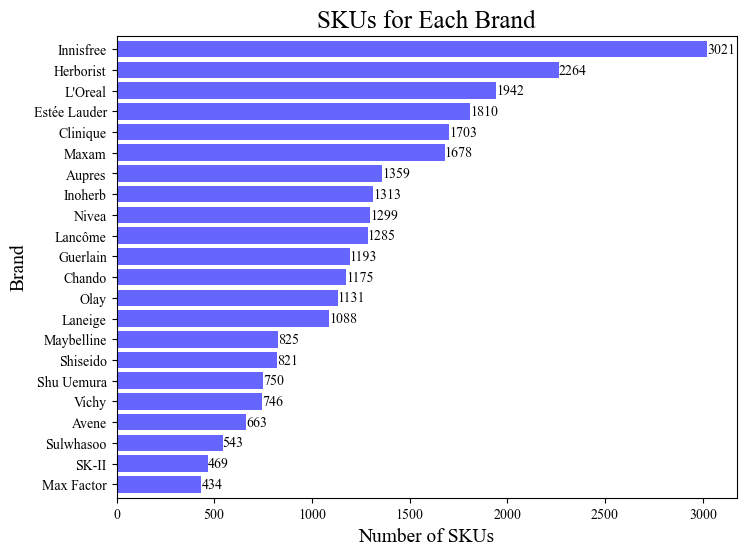

In [33]:
import matplotlib.pyplot as plt

# Set font family and enable proper handling of Unicode minus symbols
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

# Create a new figure with a specified size of 8 inches wide and 6 inches tall
fig, ax = plt.subplots(figsize=(8, 6))

# Compute and sort the count of items per brand in descending order
data['brand'].value_counts().sort_values(ascending=True).plot.barh(width=0.8,alpha=0.6,color = "b")
# Add title, labels and text on bars
ax.set_title('SKUs for Each Brand', fontsize=18)
ax.set_ylabel('Brand', fontsize=14)
ax.set_xlabel('Number of SKUs', fontsize=14)

#label the bars
ax.bar_label(ax.containers[0], fmt='%.0f')
# Display the plot
plt.show()

SKU 最高的前 5 个品牌是：

1. Innisfree 悦诗风吟

2. Herborist 佰草集

3. L'Oreal 欧莱雅

4. EstEstée Lauder 雅诗兰黛

5. Clinique 倩碧

### 3.2 品牌VS总销售额、品牌VS销售额

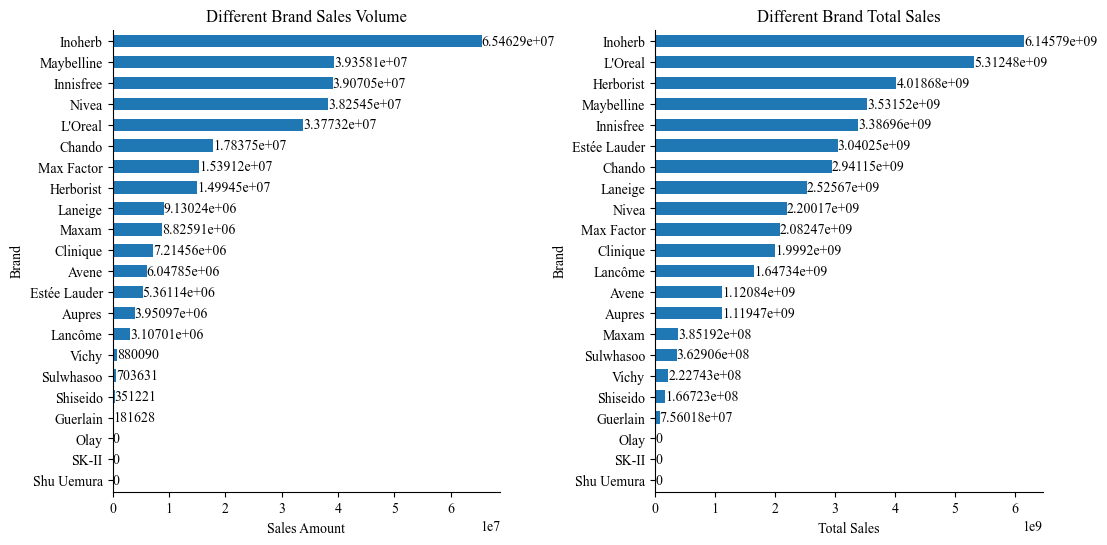

In [34]:
# Generate a figure with 1 row and 2 columns of subplots, setting the figure size to 12 inches wide and 6 inches tall.
fig,axes = plt.subplots(1,2,figsize=(12,6))

# Plot the sales volume for each brand, sorted in ascending order, on the first subplot.
ax1 = data.groupby('brand').sale_count.sum().sort_values(ascending=True).plot(kind='barh',ax=axes[0],width=0.6)
ax1.set_title('Different Brand Sales Volume',fontsize=12)
ax1.set_xlabel('Sales Amount') 
ax1.set_ylabel('Brand') 
ax1.bar_label(ax1.containers[0],label_type='edge')# Label the volume of each bar in the first subplot.

# Plot the total sales for each brand, sorted in ascending order, on the second subplot.
ax2 = data.groupby('brand')['sales'].sum().sort_values(ascending=True).plot(kind='barh',ax=axes[1],width=0.6)
ax2.set_title('Different Brand Total Sales',fontsize=12) 
ax2.set_xlabel('Total Sales') 
ax2.set_ylabel('Brand') 
ax2.bar_label(ax2.containers[0],label_type='edge')# Label the total sales of each bar in the second subplot.

# Adjust the space between the subplots.
plt.subplots_adjust(wspace=0.4)

# Remove the borders of the plots.
for ax in [ax1, ax2]:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    #ax.spines["bottom"].set_visible(False)
    #ax.spines["left"].set_visible(False)

# Display the figure.
plt.show()

销量排名前5位的品牌分别是：
1. Inoherb 相宜本草

2. Maybelline 美宝莲

3. Innisfree 悦诗风吟

4. Nivea 妮维雅

5. L'Oreal 欧莱雅

销售额最高的前 5 个品牌是：

1. Inoherb 相宜本草

2. L'Oreal 欧莱雅

3. Herborist 佰草集

4. Maybelline 美宝莲

5. Innisfree 悦诗风吟


### 3.3 各品牌产品热度

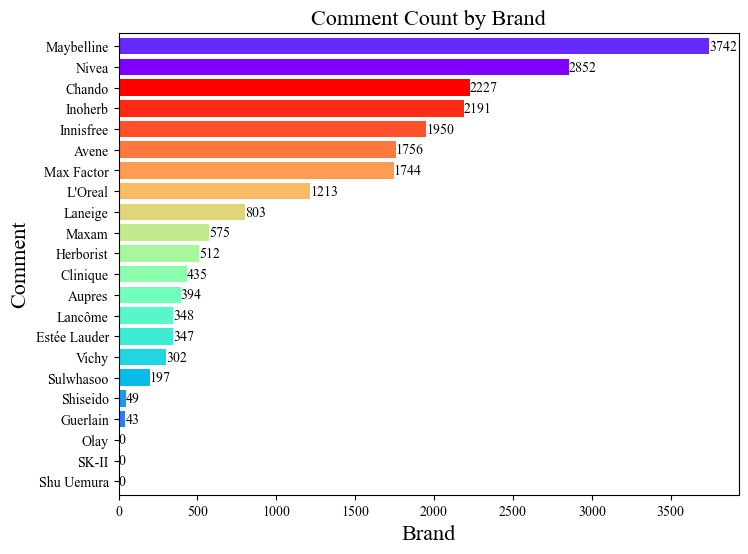

In [75]:
fig, ax = plt.subplots(figsize=(8, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, 20))
ax = data.groupby('brand').comment_count.mean().sort_values(ascending=True).plot(kind='barh',width=0.8,color = colors)
plt.title('Comment Count by Brand',fontsize=16)
plt.ylabel('Comment',fontsize=16)
plt.xlabel('Brand',fontsize=16)
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.show()

评论回复最高品牌前 5 名：美宝莲、妮维雅、Chando、相宜本草、悦诗风吟

评论回复最高品牌前 5 名：Maybelline, Nivea, Chando, Inoherb, Innisfree

C:\Users\woshi\AppData\Local\Temp\ipykernel_1644\1008384801.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt[i],xy=(x[i],y[i]))


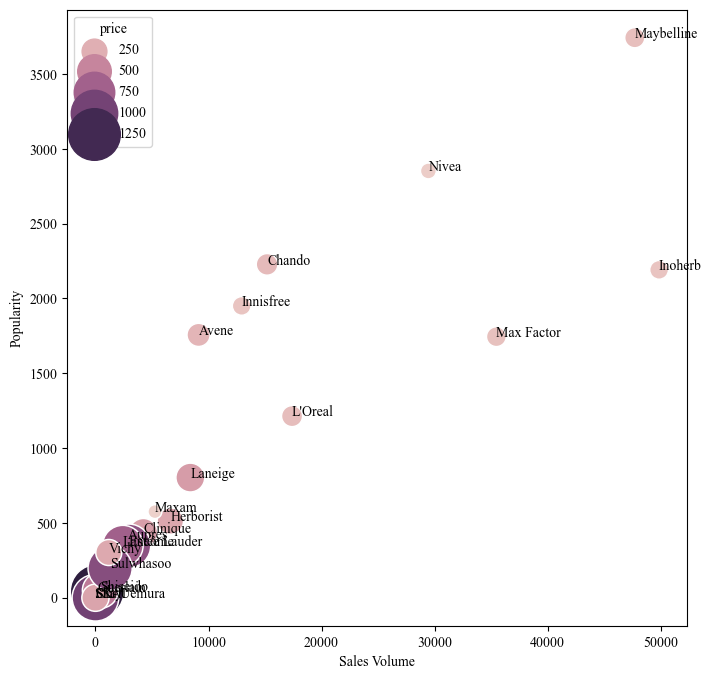

In [95]:
fig,axes = plt.subplots(figsize=(8,8))
#data
txt = data.groupby('brand').id.count().index
grouped_data = data.groupby('brand')[['sale_count', 'comment_count', 'price']].mean()
#scatter
sns.scatterplot(data=grouped_data,x= 'sale_count',y = 'comment_count',size='price',hue='price',sizes=(100,1500))
#annotate
for i in range(len(txt)):
    plt.annotate(txt[i],xy=(x[i],y[i]))  
#label
plt.ylabel('Popularity')
plt.xlabel('Sales Volume')

plt.show()

### 3.4 主品类占比、子品类所有品牌及各品牌占比
#### 3.41 主品类占比、子品类所有品牌占比

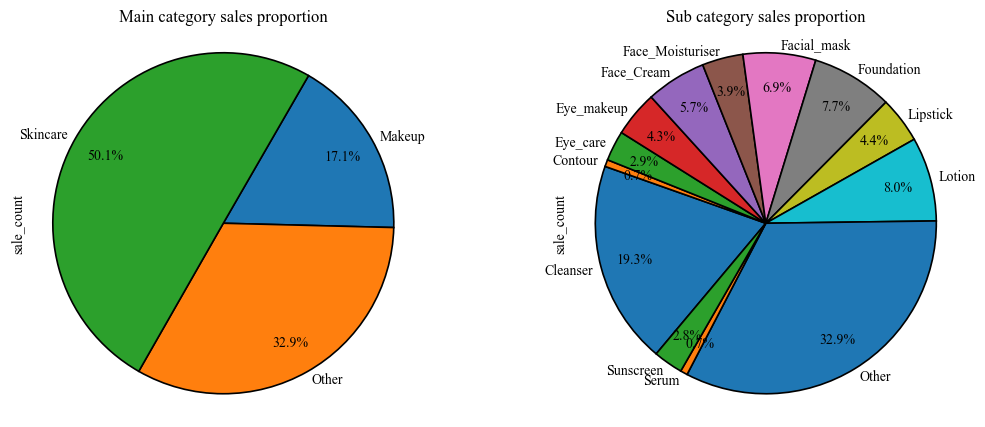

In [ ]:
import matplotlib.pyplot as plt

# createa figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# calculate the main category sales proportion
data1 = data.groupby('main_type')['sale_count'].sum()

# draw the pie chart of main category sales proportion
ax1 = data1.plot(kind='pie', ax=axes[0],
                 autopct='%.1f%%',
                 pctdistance=0.8,
                 labels=data1.index,
                 labeldistance=1.05,
                 startangle=60,
                 radius=1.1,
                 counterclock=False,
                 wedgeprops={'linewidth': 1.2, 'edgecolor': 'k'},
                 textprops={'fontsize': 10, 'color': 'k'})
ax1.set_title('Main category sales proportion', fontsize=12)

# calculate the sub category sales proportion
data2 = data.groupby('sub_type')['sale_count'].sum()

# draw the pie chart of sub category sales proportion
ax2 = data2.plot(kind='pie', ax=axes[1],
                 autopct='%.1f%%',
                 pctdistance=0.8,
                 labels=data2.index,
                 labeldistance=1.05,
                 startangle=230,
                 radius=1.1,
                 counterclock=False,
                 wedgeprops={'linewidth': 1.2, 'edgecolor': 'k'},
                 textprops={'fontsize': 10, 'color': 'k'})
ax2.set_title('Sub category sales proportion', fontsize=12)

# set the space between subplots
plt.subplots_adjust(wspace=0.4)

# 显示图形
plt.show()

从各大品类的销售占比可以看出，护肤品的销售占比远高于彩妆。 有两种情况。 第一个是护肤品占主导地位，女性消耗的护肤品远多于化妆品。 这个时候，我们应该加大对化妆品的讲解和推广，让更多的女性了解化妆品的必要性。 第二种情况是我们的产品分类不合理，因为还有接近33%的其他品类，这里面的产品需要细分。

从细分品类销售占比来看，彩妆中销量最大的是粉底彩妆和口红，护肤品中销量最大的是洗面奶、乳液、面霜。

#### 3.42 主品类各品牌占比

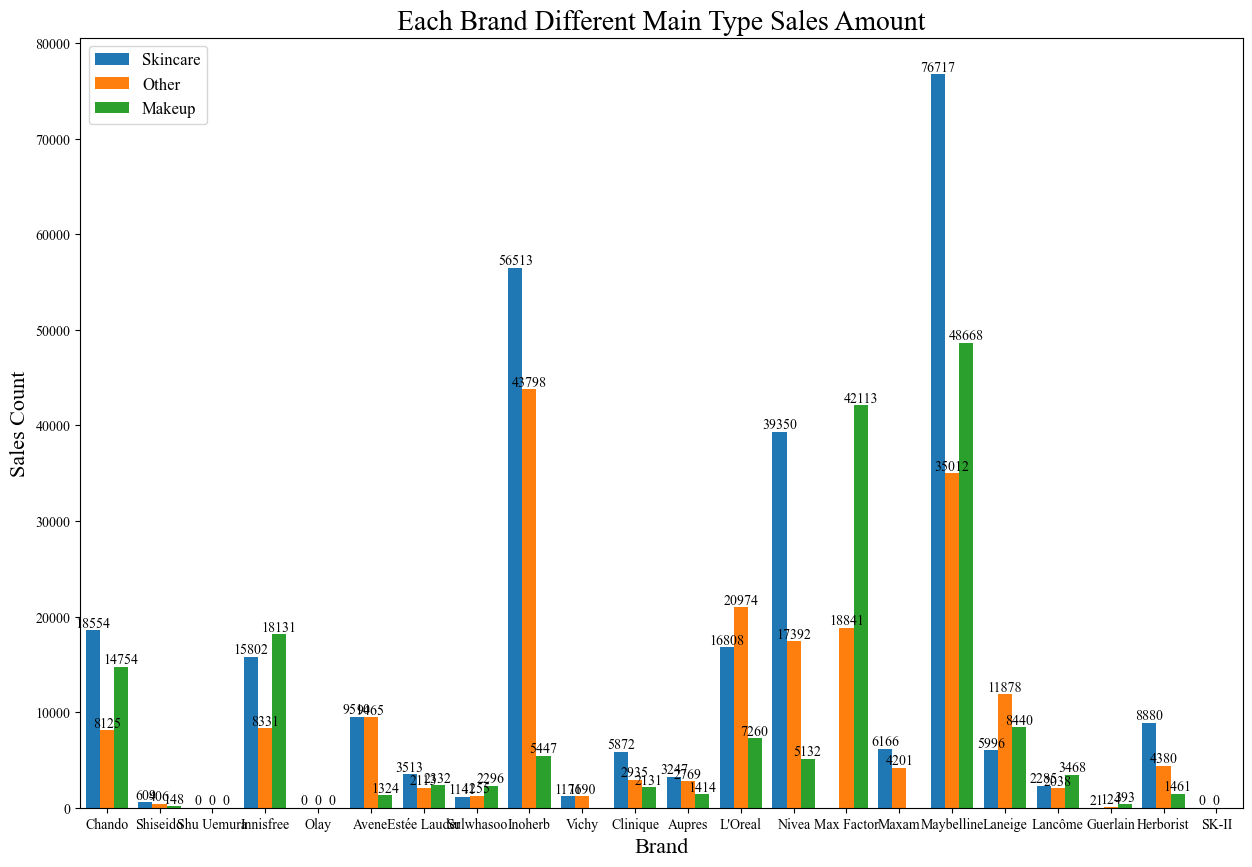

In [219]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data,y='sale_count',x = 'brand',hue='main_type',saturation=1,errorbar=('ci', 0))
#label bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
plt.title('Each Brand Different Main Type Sales Amount', fontsize=20)
plt.xlabel('Brand', fontsize=16)
plt.ylabel('Sales Count', fontsize=16)
plt.legend(fontsize=12)
plt.show()

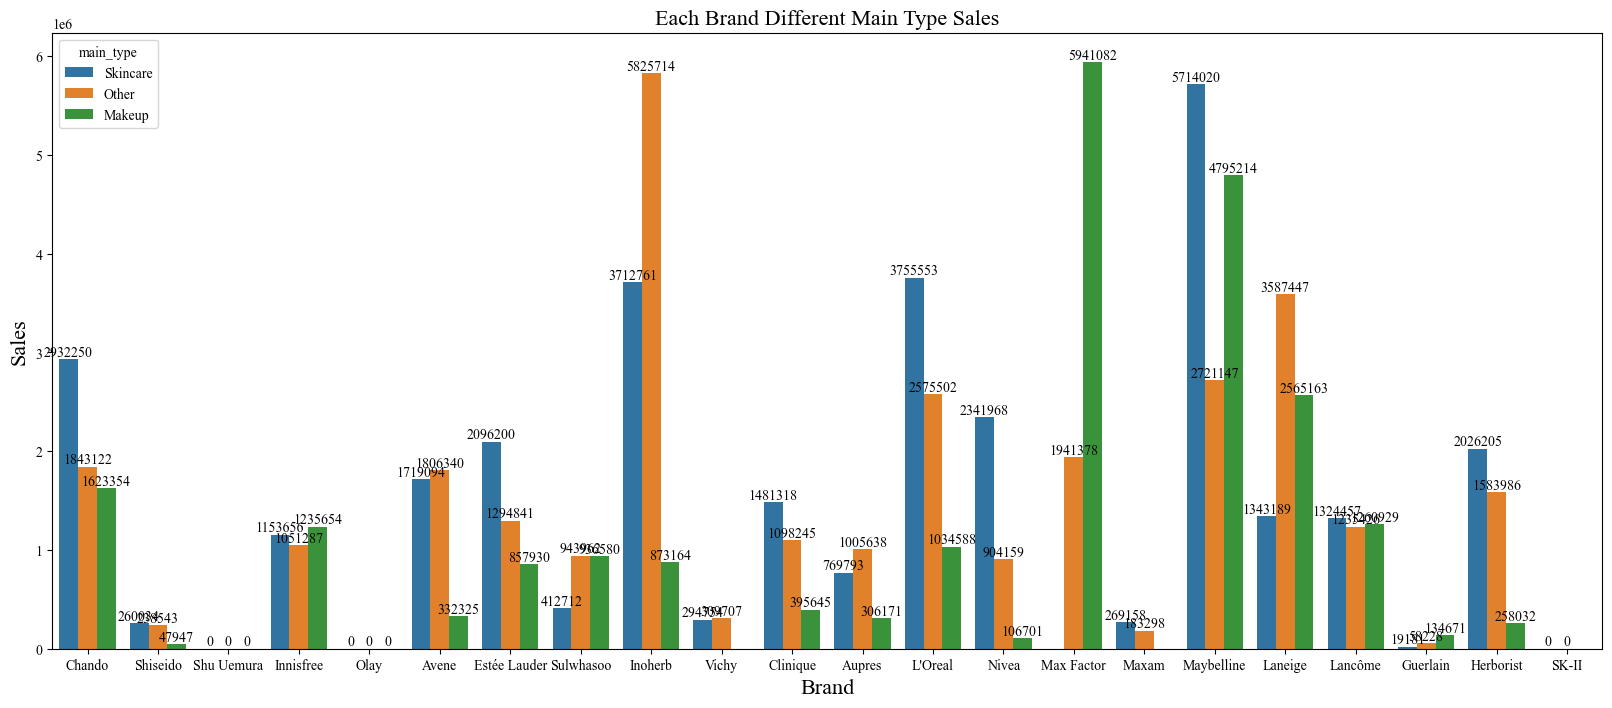

In [230]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x='brand',y='sales',hue='main_type',data=data,saturation=0.75,errorbar=('ci', 0))
plt.title('Each Brand Different Main Type Sales', fontsize=16)
plt.xlabel('Brand', fontsize=16)
plt.ylabel('Sales', fontsize=16)
#label bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

#### 3.43 子类目各品牌占比

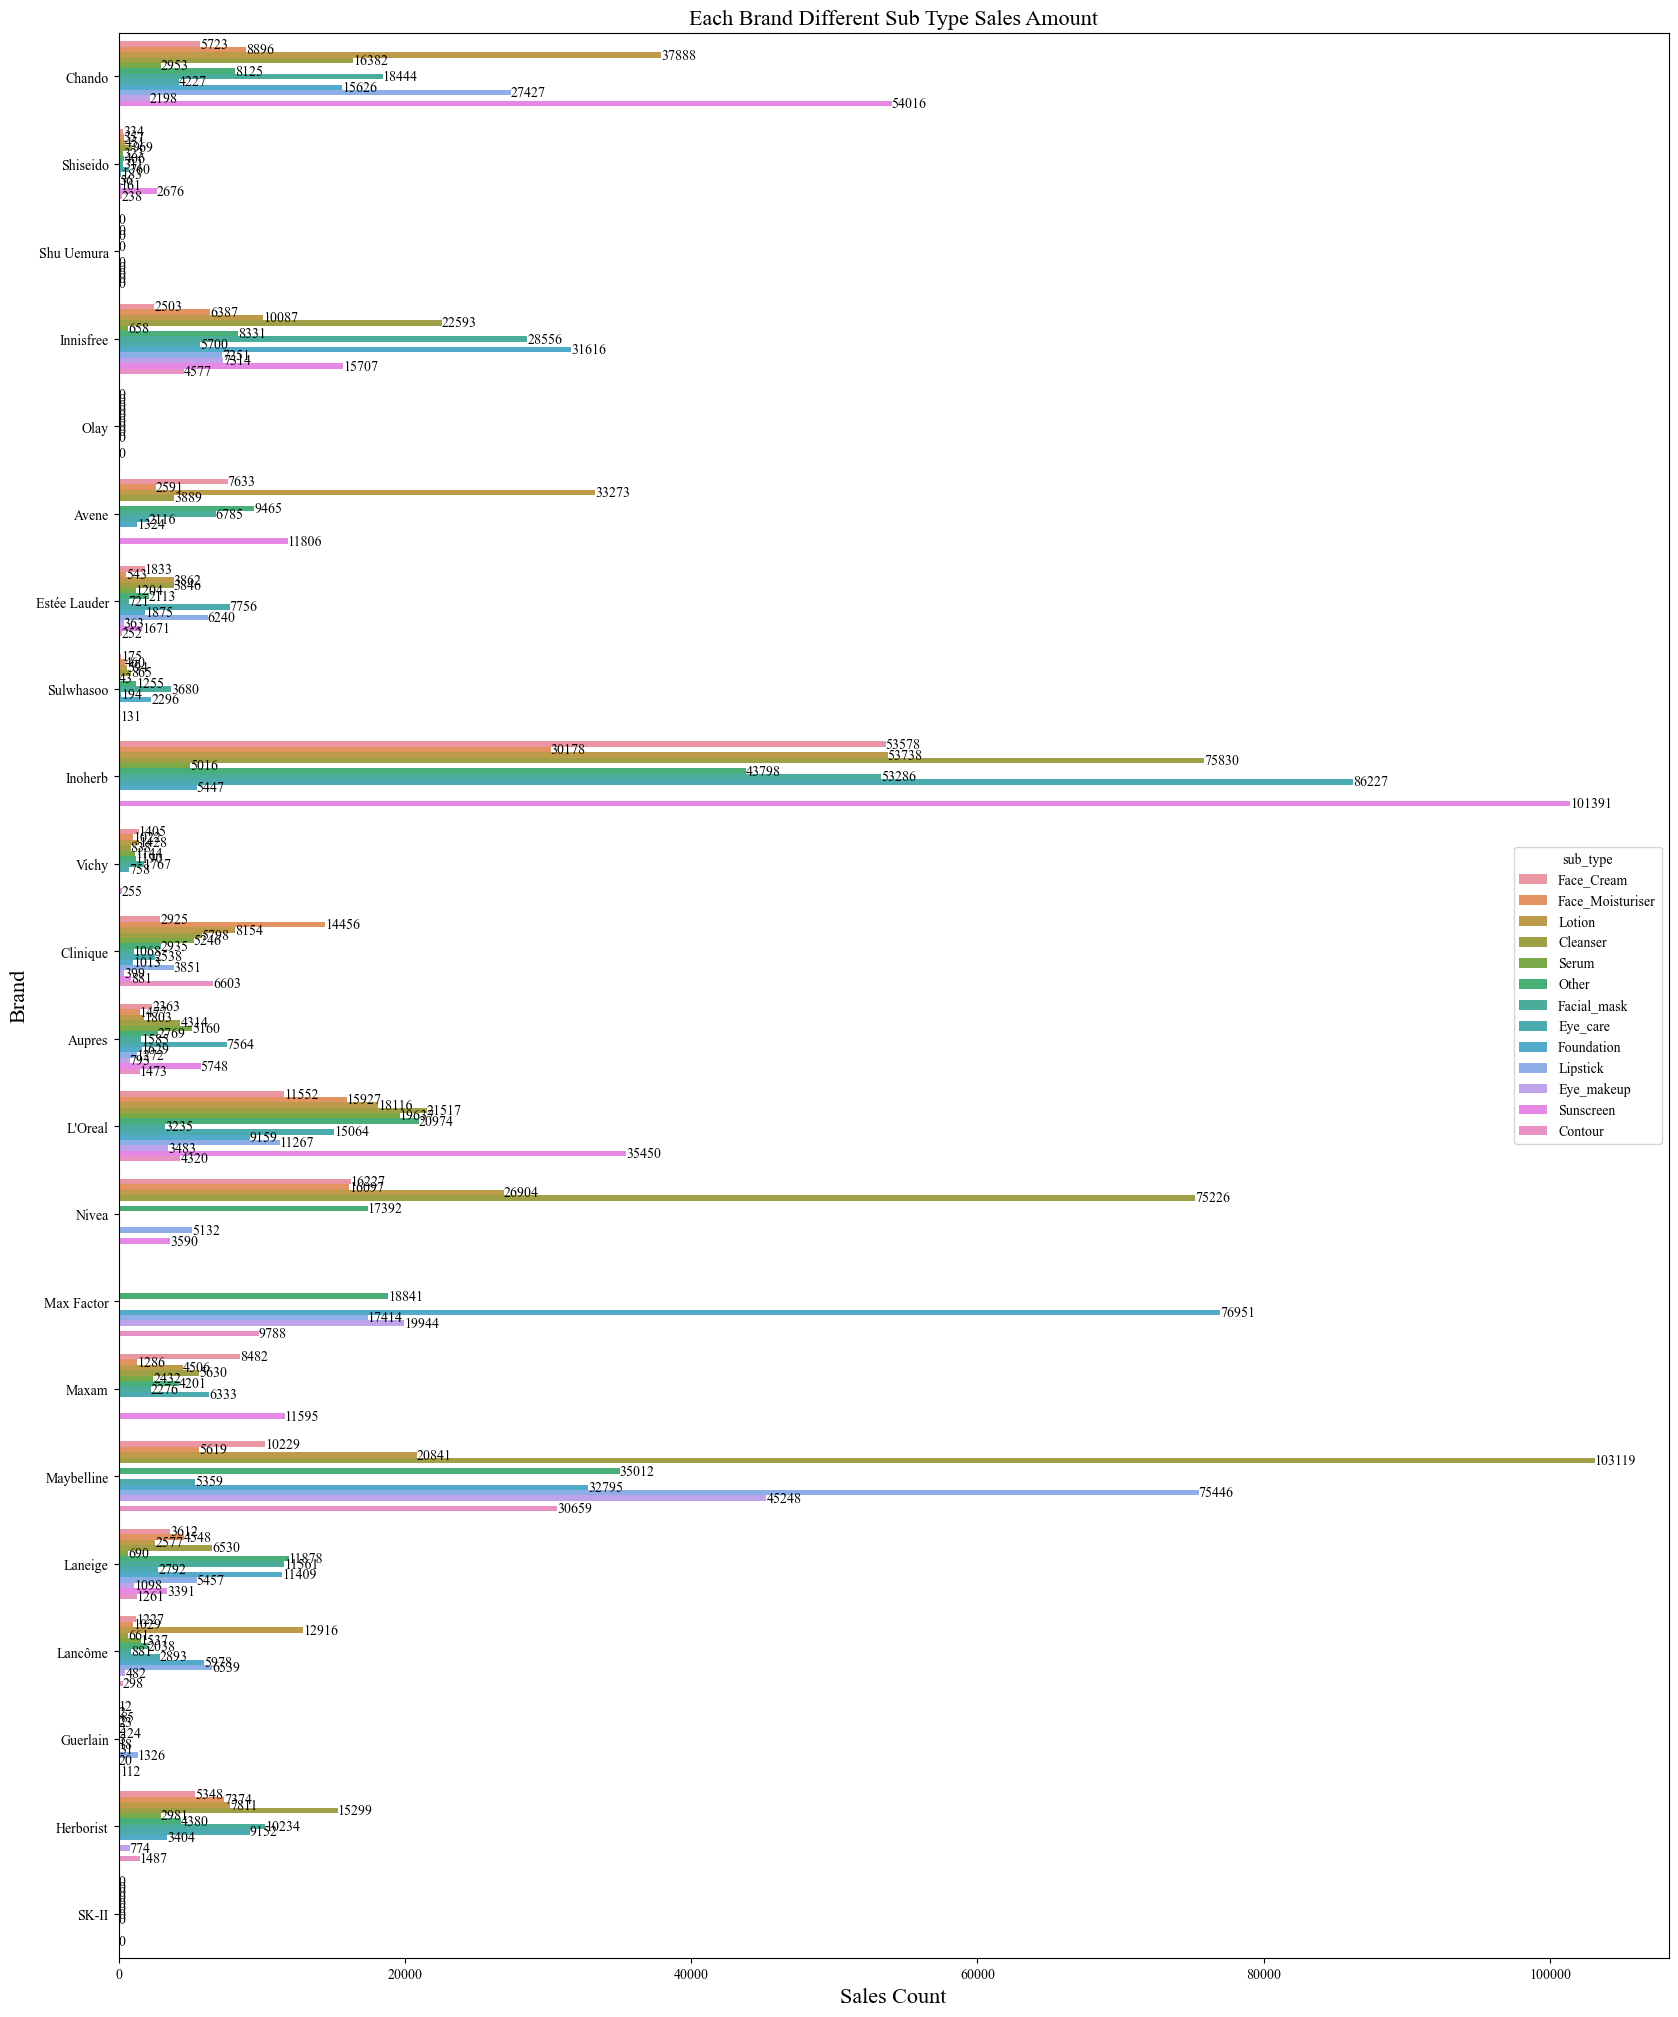

In [231]:
#Each Brand Different Sub Type Sales Amount
plt.figure(figsize=(20,25))
ax = sns.barplot(y='brand',x='sale_count',hue='sub_type',data=data,saturation=0.75,errorbar=('ci', 0))
plt.title('Each Brand Different Sub Type Sales Amount', fontsize=16)
plt.xlabel('Sales Count', fontsize=16)
plt.ylabel('Brand', fontsize=16)
#label bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

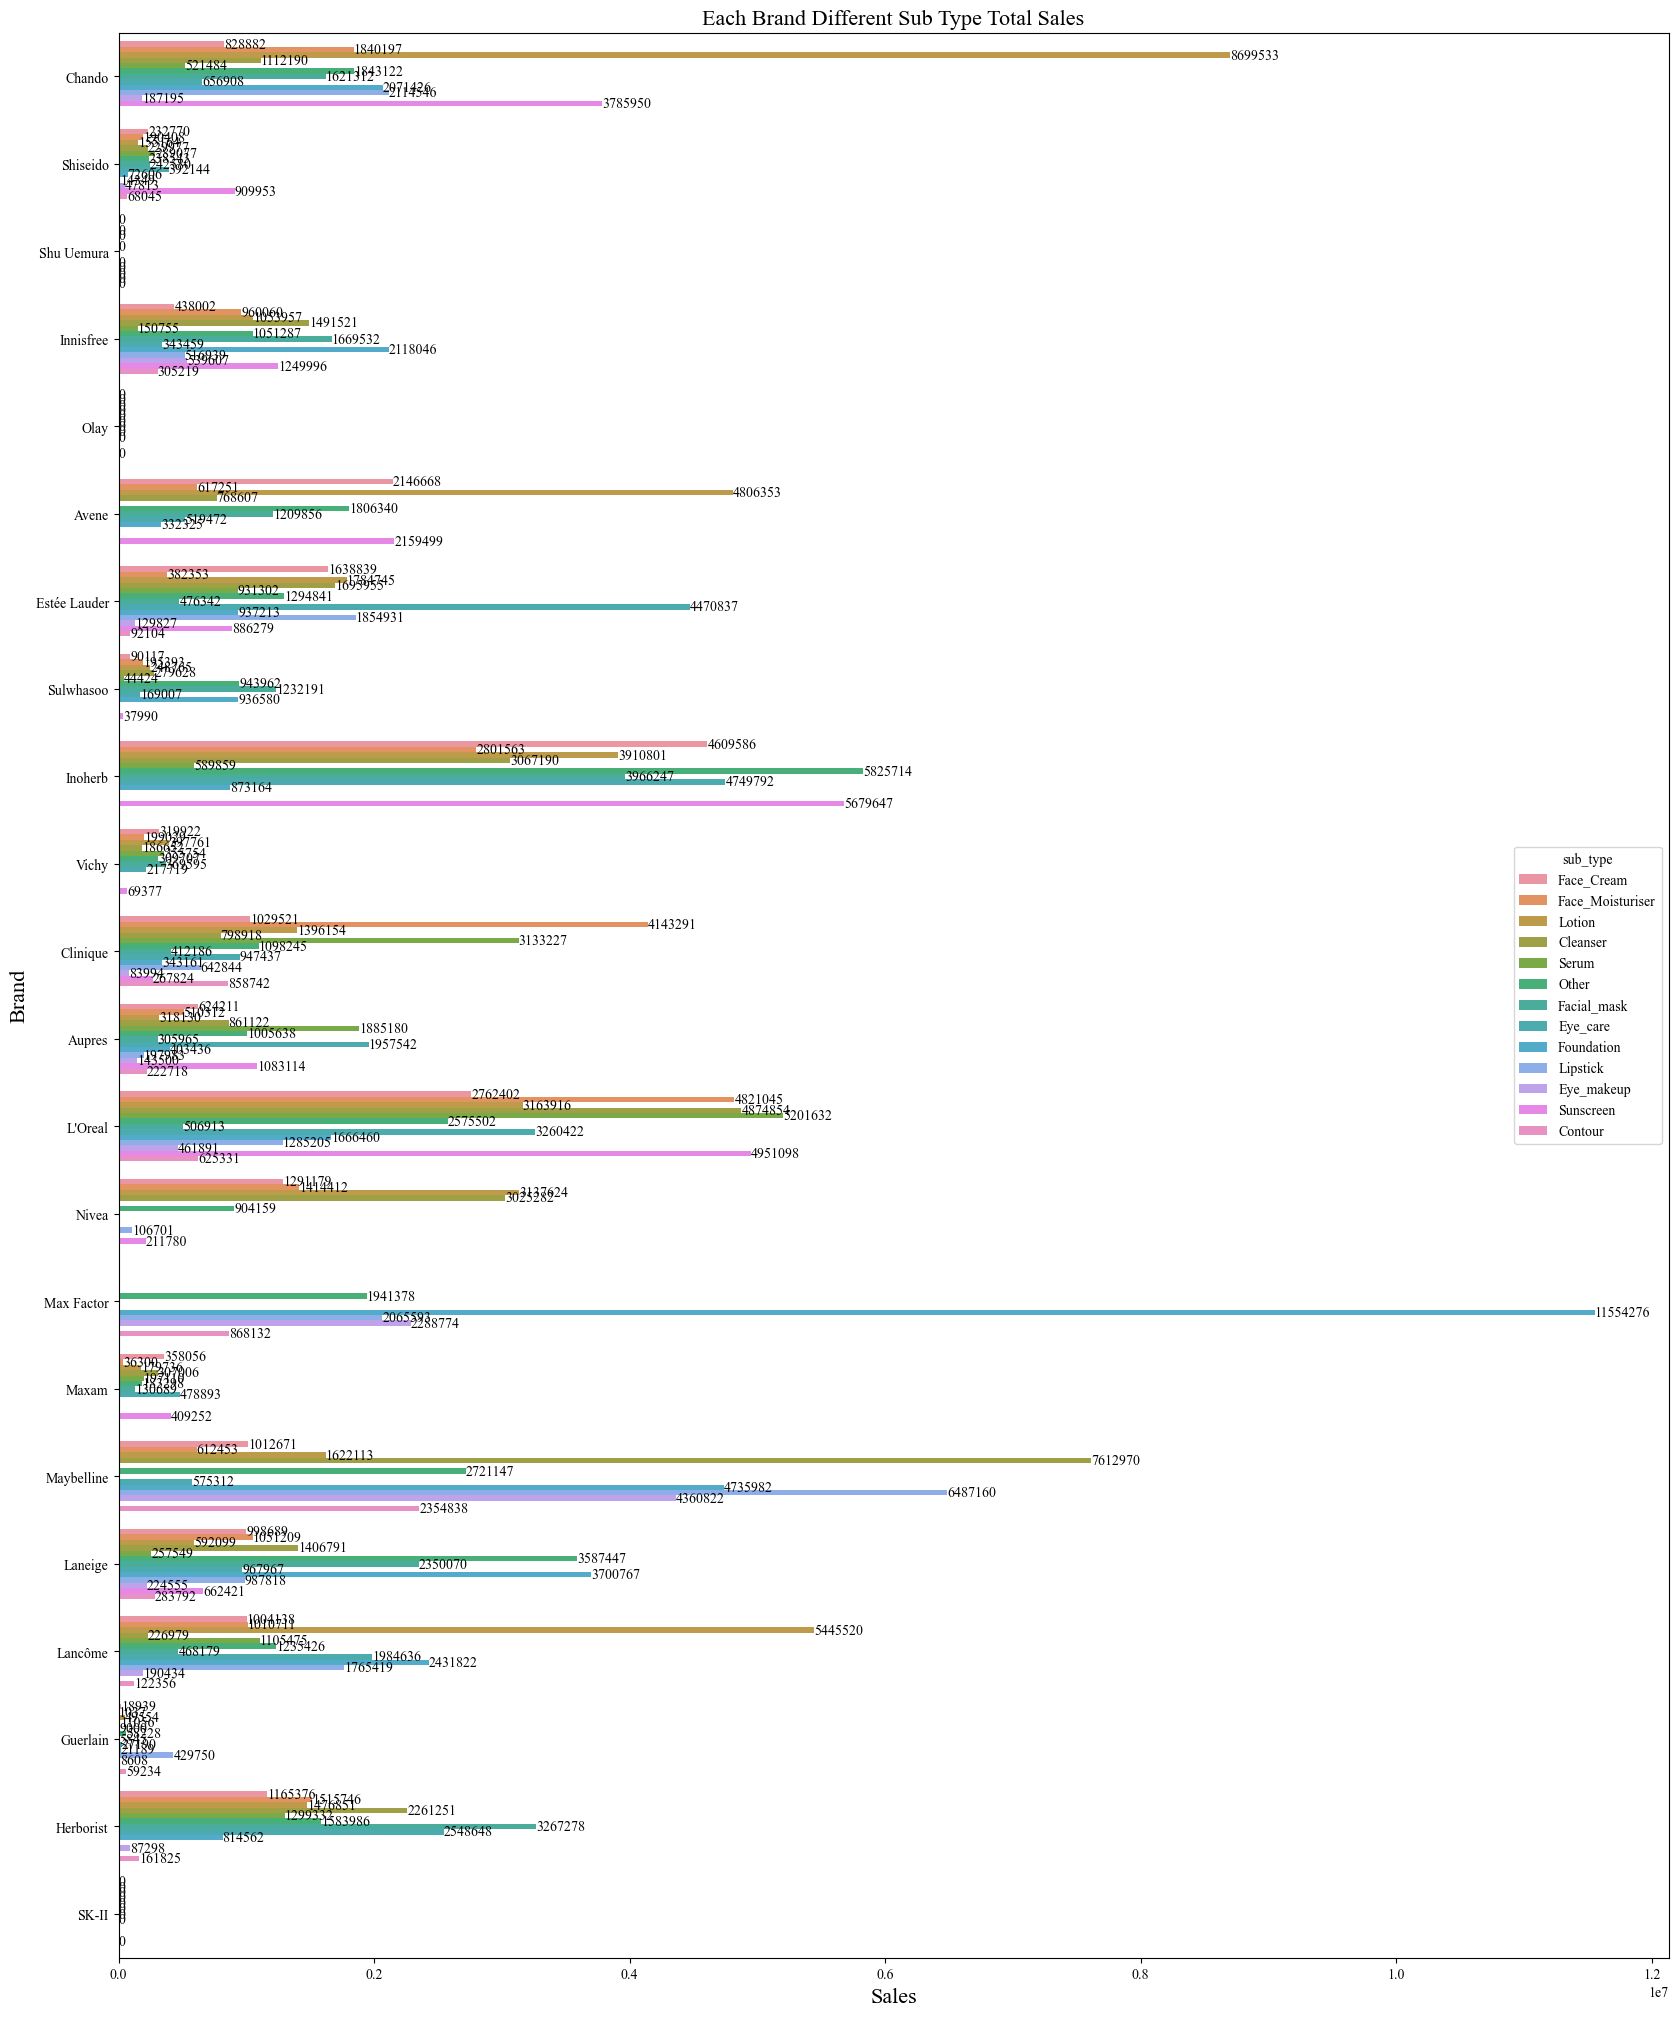

In [232]:
#Each Brand Different Sub Type Sales Amount
plt.figure(figsize=(20,25))
ax = sns.barplot(y='brand',x='sales',hue='sub_type',data=data,saturation=0.75,errorbar=('ci', 0))
plt.title('Each Brand Different Sub Type Total Sales', fontsize=16)
plt.xlabel('Sales', fontsize=16)
plt.ylabel('Brand', fontsize=16)
#label bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

### 3.5 男士护肤品销售

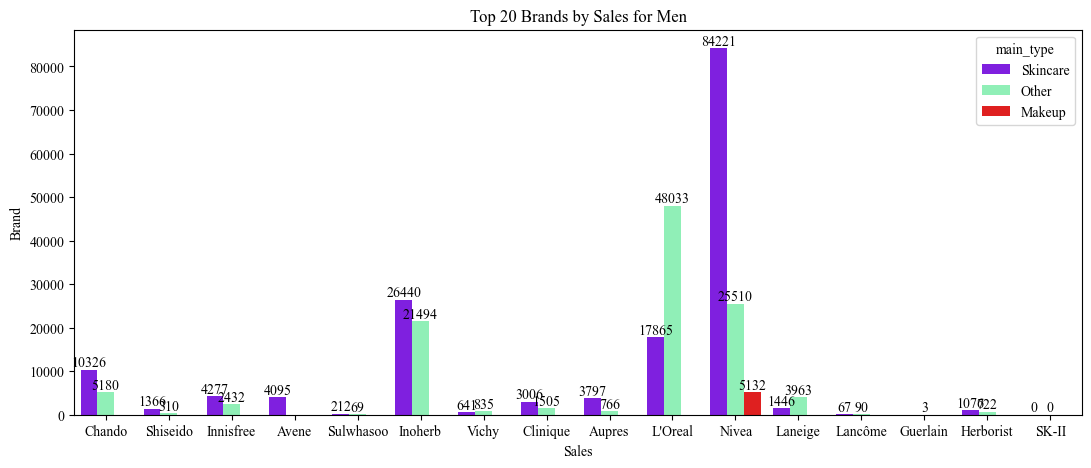

In [135]:
male_sales = data[data['For_Male']=="Yes"]
colors = plt.cm.rainbow(np.linspace(0, 1, 3))
fig,ax = plt.subplots(figsize=(13,5))
sns.barplot(x='brand',y='sale_count',hue='main_type',data =male_sales,saturation=0.75,errorbar=('ci', 0),palette=colors)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
plt.xlabel("Sales")
plt.ylabel("Brand")
plt.title("Top 20 Brands by Sales for Men")
plt.show()

## 3.6 时间和销售

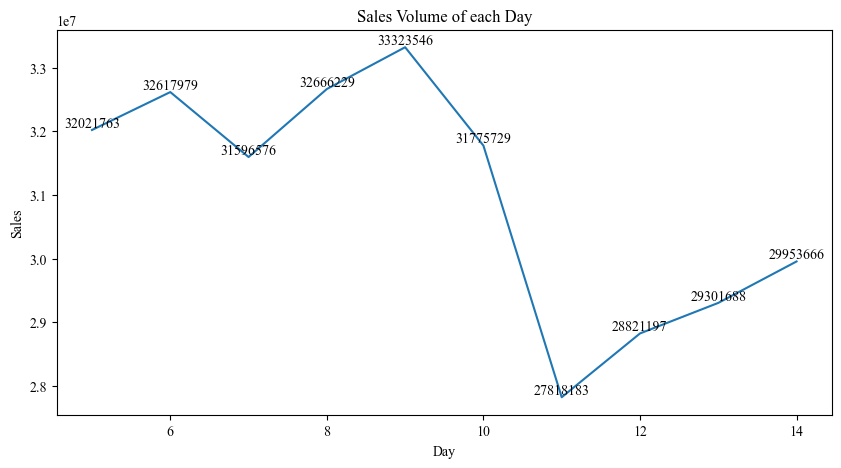

In [161]:
fig,ax = plt.subplots(figsize=(10,5))
daily_sales = data.groupby('day').sale_count.sum()
ax.plot(daily_sales.index, daily_sales.values)
for x, y in zip(daily_sales.index, daily_sales.values):
    ax.annotate(f'{y:.0f}', xy=(x, y), ha='center', va='bottom')

plt.xlabel("Day")
plt.ylabel("Sales")
plt.title("Sales Volume of each Day")
plt.show()

1. 可以看到，双十一期间销量非常好，预热做得很好。
2. 双十一销量低的原因是大部分销量在预售阶段就已经确认。
3. 双十一后，销售部分恢复，促销活动仍在进行，但促销力度有所减弱。

总结：
1. 护肤品占销售额的50%，比化妆品大得多。
2. 洗面奶、乳液、粉底、面膜，占比较高。
3. 用户对250元以下的产品更容易接受，畅销的可能性更大。 物美价廉的产品是大多数客户的选择。
4. 销量好的产品一般都有很多用户反馈，而且反馈往往是正面的。
5. 产品的SKU数量与销量关系不大，比如美宝莲。
6. 适当的促销可以保证高销量和销量。

建议：
1. 网购主力军仍是中低收入人群。 卖家可以通过社交平台适当调整产品价格，提高产品知名度，从而增加销量。
2. 男性消费者注重性价比和护肤品，可以推出价格实惠的男士产品。 因为男士护肤品市场还有很大的探索空间。
3. 可以将产品组合成套餐，将销量低的单品和销量高的单品进行堆叠，并提供一些促销活动来促进销量低的单品的受欢迎程度。
4. 虽然促销会影响收入，但可以产生新的客户群体并从退货中获得更多收益。